In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

In [2]:
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),origin = train_dataset_url)
print(train_dataset_fp)

/Users/unlimitediw/.keras/datasets/iris_training.csv


In [3]:
!head -n5 {train_dataset_fp}
import pandas as pd

df = pd.read_csv(train_dataset_fp)
# column_names = list(df.columns)
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]
print(column_names)
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [4]:
# another way to change csv
batch_size = 32
train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)
print(train_dataset)

Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.
<DatasetV1Adapter shapes: (OrderedDict([(sepal_length, (?,)), (sepal_width, (?,)), (petal_length, (?,)), (petal_width, (?,))]), (?,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>


In [5]:
features, labels = next(iter(train_dataset))
features

Instructions for updating:
Colocations handled automatically by placer.


OrderedDict([('sepal_length',
              <tf.Tensor: id=58, shape=(32,), dtype=float32, numpy=
              array([6.1, 5.7, 6.4, 5.2, 4.6, 7.2, 5.1, 4.8, 6. , 4.7, 6.2, 7.7, 6.8,
                     5. , 5.7, 5.4, 4.9, 6.6, 5.6, 4.8, 6.7, 7.3, 4.9, 7.7, 7.7, 6.1,
                     4.6, 4.9, 7.2, 5.5, 6.1, 5.8], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=59, shape=(32,), dtype=float32, numpy=
              array([2.8, 3.8, 3.2, 2.7, 3.2, 3.6, 3.8, 3.1, 2.7, 3.2, 2.8, 3.8, 3. ,
                     3.5, 3. , 3. , 3.1, 2.9, 2.7, 3.4, 3.3, 2.9, 2.5, 3. , 2.6, 2.9,
                     3.4, 3.1, 3.2, 2.6, 2.6, 4. ], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=56, shape=(32,), dtype=float32, numpy=
              array([4.7, 1.7, 5.3, 3.9, 1.4, 6.1, 1.5, 1.6, 5.1, 1.3, 4.8, 6.7, 5.5,
                     1.3, 4.2, 4.5, 1.5, 4.6, 4.2, 1.6, 5.7, 6.3, 4.5, 6.1, 6.9, 4.7,
                     1.4, 1.5, 6. , 4.4, 5.6, 1.2],

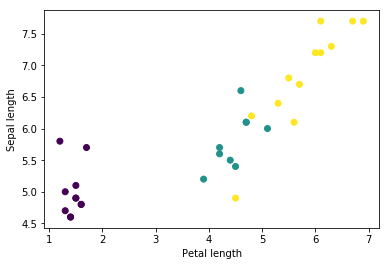

In [6]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length");

In [7]:
# tf.stack get value from tensor and create compose tensor
def pack_features_vector(features,labels):
    features = tf.stack(list(features.values()),axis=1)
    return features,labels

In [8]:
# use tf.data.Dataset.map to map each features to the training set
# map func
train_dataset = train_dataset.map(pack_features_vector)

In [9]:
features,labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[7.7 3.8 6.7 2.2]
 [6.3 2.3 4.4 1.3]
 [6.  2.2 5.  1.5]
 [5.4 3.  4.5 1.5]
 [4.4 2.9 1.4 0.2]], shape=(5, 4), dtype=float32)


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.nn.relu,input_shape=(4,)),
    tf.keras.layers.Dense(10,activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [11]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=224, shape=(5, 3), dtype=float32, numpy=
array([[ 0.9913933 , -0.9446529 , -1.0088906 ],
       [ 0.8500724 , -0.5772352 , -0.7854374 ],
       [ 0.9044318 , -0.83381486, -0.90768266],
       [ 0.53438866, -0.49211583, -0.52689123],
       [ 0.9752962 ,  0.35411546, -0.793524  ]], dtype=float32)>

In [12]:
# map to probability
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=230, shape=(5, 3), dtype=float32, numpy=
array([[0.7815125 , 0.11275135, 0.10573618],
       [0.69695777, 0.16723788, 0.13580433],
       [0.7467496 , 0.1312998 , 0.12195052],
       [0.5867616 , 0.21021149, 0.20302695],
       [0.5855337 , 0.3146129 , 0.09985343]], dtype=float32)>

In [13]:
def loss(model,x,y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y,logits=y_)
l = loss(model, features, labels)
print("Loss test: {}".format(l))

Instructions for updating:
Use tf.cast instead.
Loss test: 1.478826642036438


In [14]:
def grad(model,inputs,targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model,inputs,targets)
    return loss_value, tape.gradient(loss_value,model.trainable_variables)

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
global_step = tf.train.get_or_create_global_step()

In [16]:
loss_value,grads = grad(model,features,labels)
print(loss_value)
optimizer.apply_gradients(zip(grads,model.variables),global_step)
print(loss(model,features,labels).numpy())

tf.Tensor(1.4788266, shape=(), dtype=float32)
1.1420207


In [17]:
# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201
for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()
    
    for x,y in train_dataset:
        # optimize model
        loss_value,grads = grad(model,x, y)
        optimizer.apply_gradients(zip(grads,model.variables),global_step)
        # Track progress
        epoch_loss_avg(loss_value)
        # compare predicted label to actual label
        epoch_accuracy(tf.argmax(model(x),axis = 1,output_type =tf.int32),y)
    
    # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 ==0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.026, Accuracy: 36.667%
Epoch 050: Loss: 0.601, Accuracy: 92.500%
Epoch 100: Loss: 0.486, Accuracy: 93.333%
Epoch 150: Loss: 0.401, Accuracy: 94.167%
Epoch 200: Loss: 0.330, Accuracy: 95.833%


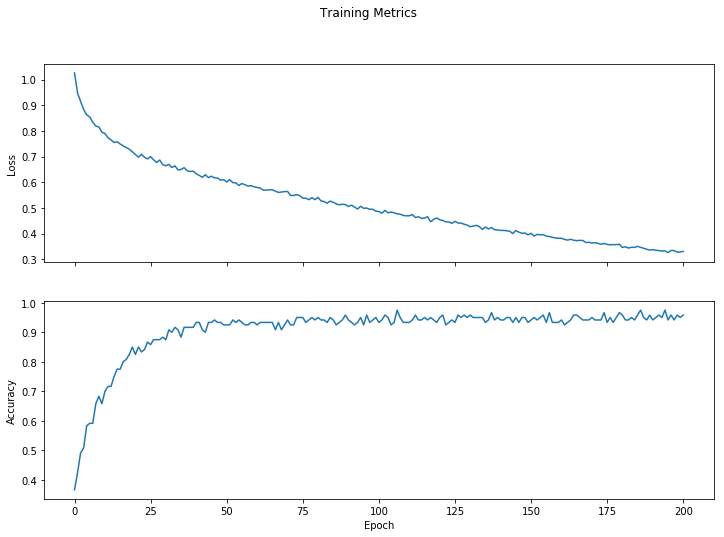

In [18]:
# visualization loss function
fig, axes = plt.subplots(2,sharex = True,figsize=(12,8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss")
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].plot(train_accuracy_results)

In [19]:
test_url = "http://download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [20]:
test_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [22]:
test_accuracy = tfe.metrics.Accuracy()
for (x,y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits,axis = 1,output_type=tf.int32)
    test_accuracy(prediction,y)

print(test_accuracy.result())

tf.Tensor(0.95, shape=(), dtype=float64)
